In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker

In [9]:
data = pd.DataFrame({
    'Planeta': ['Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno'],
    'g (m/s²)': [9.8, 3.7, 24.8, 9.0, 8.7, 11.0]})

print(data)


   Planeta  g (m/s²)
0   Tierra       9.8
1    Marte       3.7
2  Júpiter      24.8
3  Saturno       9.0
4    Urano       8.7
5  Neptuno      11.0


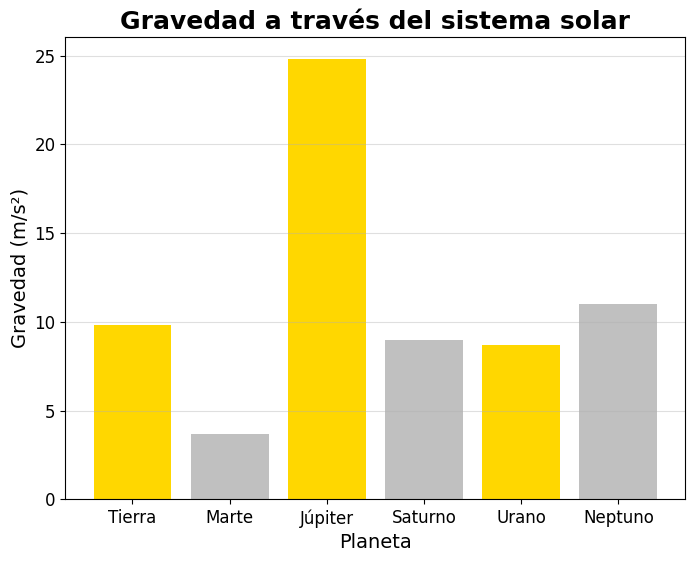

In [12]:

colors = ['#FFD700', '#C0C0C0']

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(data['Planeta'], data['g (m/s²)'], color=colors)

ax.set_title('Gravedad a través del sistema solar', fontsize=18, fontweight='bold')
ax.set_xlabel('Planeta', fontsize=14)
ax.set_ylabel('Gravedad (m/s²)', fontsize=14)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', alpha=0.4)

plt.show()

In [14]:
fake = Faker()

planet_g_values = {
    'Tierra': 9.8,
    'Marte': 3.7,
    'Júpiter': 24.8,
    'Saturno': 9.0,
    'Urano': 8.7,
    'Neptuno': 11.0
}

def generate_samples(num_samples):
    samples = []
    for i in range(num_samples):
        L = round(random.uniform(0.8, 2.5), 2)
        t = round(random.uniform(0.4, 0.7), 2)
        g_calculated = round((2 * L) / (t**2), 2)

        g_diffs = {planet: abs(g_calculated - g) for planet, g in planet_g_values.items()}

        sorted_planets = sorted(g_diffs.keys(), key=lambda x: g_diffs[x])

        top_3_planets = sorted_planets[:3]

        sample = {
            "ID": fake.uuid4(),
            "Longitud (m)": L,
            "Tiempo (s)": t,
            "g_calculado (m/s²)": g_calculated,
            "Planeta más probable": top_3_planets[0],
            "2do más probable": top_3_planets[1],
            "3ro más probable": top_3_planets[2]
        }

        samples.append(sample)

    return samples

dataset = generate_samples(1000)

for sample in dataset:
    print(sample)



{'ID': '1c8e2d42-d0b8-4946-8fae-085556df4606', 'Longitud (m)': 1.73, 'Tiempo (s)': 0.4, 'g_calculado (m/s²)': 21.62, 'Planeta más probable': 'Júpiter', '2do más probable': 'Neptuno', '3ro más probable': 'Tierra'}
{'ID': '11404892-5c8c-46b6-9430-0c988ead1a89', 'Longitud (m)': 1.53, 'Tiempo (s)': 0.65, 'g_calculado (m/s²)': 7.24, 'Planeta más probable': 'Urano', '2do más probable': 'Saturno', '3ro más probable': 'Tierra'}
{'ID': 'a116220f-be9a-4b7e-ade0-3adec6f7d152', 'Longitud (m)': 2.38, 'Tiempo (s)': 0.48, 'g_calculado (m/s²)': 20.66, 'Planeta más probable': 'Júpiter', '2do más probable': 'Neptuno', '3ro más probable': 'Tierra'}
{'ID': 'ba0618bb-cb21-4c82-8979-65ed29fa480e', 'Longitud (m)': 1.33, 'Tiempo (s)': 0.58, 'g_calculado (m/s²)': 7.91, 'Planeta más probable': 'Urano', '2do más probable': 'Saturno', '3ro más probable': 'Tierra'}
{'ID': '61096397-435c-4b34-9b01-c5da59c2c668', 'Longitud (m)': 1.05, 'Tiempo (s)': 0.68, 'g_calculado (m/s²)': 4.54, 'Planeta más probable': 'Marte', '

In [16]:
csv_filename = "planet_dataset.csv"
df = pd.DataFrame(dataset)
df.to_csv(csv_filename, index=False)

filepath = "planet_dataset.csv"
data_frame = pd.read_csv(filepath)

data_frame.head(1000)

,ID,Longitud (m),Tiempo (s),g_calculado (m/s²),Planeta más probable,2do más probable,3ro más probable
0,1c8e2d42-d0b8-4946-8fae-085556df4606,1.73,0.40,21.62,Júpiter,Neptuno,Tierra
1,11404892-5c8c-46b6-9430-0c988ead1a89,1.53,0.65,7.24,Urano,Saturno,Tierra
2,a116220f-be9a-4b7e-ade0-3adec6f7d152,2.38,0.48,20.66,Júpiter,Neptuno,Tierra
3,ba0618bb-cb21-4c82-8979-65ed29fa480e,1.33,0.58,7.91,Urano,Saturno,Tierra
4,61096397-435c-4b34-9b01-c5da59c2c668,1.05,0.68,4.54,Marte,Urano,Saturno
...,...,...,...,...,...,...,...
995,30f09277-5149-4395-b2fc-3916f47fbe71,2.03,0.43,21.96,Júpiter,Neptuno,Tierra
996,6437fc5e-e123-4d2a-9279-165cd1a9ab02,2.50,0.68,10.81,Neptuno,Tierra,Saturno
997,dba4fa9d-6358-4f4c-8657-4f6d2ec32689,0.95,0.44,9.81,Tierra,Saturno,Urano
998,9e1b685f-1d43-43f4-b9a5-a657a5b7aef4,1.30,0.63,6.55,Urano,Saturno,Marte


Fórmula: L = 1/2 x g x t^2
A.- Con una longitud L= 1.00 m cronometran t = 0.46 s.

¿Cuánto vale g y su error?

¿En qué planeta están, o pueden estar?



In [3]:
L = 1  # m
t = 0.46  # s
delta_L = 0.01  # m
delta_t = 0.01  # s

g = 2 * L / t**2

dg_dL = 2 / t**2
dg_dt = -4 * L / t**3

delta_g = np.sqrt((dg_dL * delta_L)**2 + (dg_dt * delta_t)**2)

df = pd.DataFrame({'Aceleración de la gravedad medida (g)': [g],
                   'Error en la medición de g': [delta_g]})

print(df)


   Aceleración de la gravedad medida (g)  Error en la medición de g
0                               9.451796                   0.421677


La aceleración de la gravedad medida es de 9.451796 m/s^2 y el error en la medición es de 0.421677 m/s^2. A partir de esto, podemos calcular el rango de valores posibles para g:
Rango inferior: 9.451796 - 0.421677 = 9.030119 m/s^2
Rango superior: 9.451796 + 0.421677 = 9.873473 m/s^2

Teniendo en cuenta los datos de la tabla, podemos determinar que la tripulación podría estar en:

Saturno (g = 9.0 m/s^2), ya que 9.0 está dentro del rango de 9.030119 a 9.873473 m/s^2.
Tierra (g = 9.8 m/s^2), ya que 9.8 también está dentro del rango de 9.030119 a 9.873473 m/s^2.

B.- Con una longitud L=2.00 m cronometran t = 0.66 s.

¿Cuánto vale g y su error?

¿En qué planeta están, o pueden estar?

¿Con que probabilidad puedes afirmarlo?

In [4]:
L = 2.00  # m
t = 0.66  # s
delta_L = 0.01  # m
delta_t = 0.01  # s

dg_dL = 2 / t**2
dg_dt = -4 * L / t**3

delta_g = np.sqrt((dg_dL * delta_L)**2 + (dg_dt * delta_t)**2)
g = 2 * L / t**2

df = pd.DataFrame({'Aceleración gravedad medida (g)': [g],
                   'Error de g': [delta_g]})

print(df)

   Aceleración de la gravedad medida (g)  Error en la medición de g
0                               9.182736                   0.282027


Según los resultados obtenidos, podemos calcular el rango de valores posibles para g:
Rango inferior: 9.18 - 0.28 = 8.90 m/s²
Rango superior: 9.18 + 0.28 = 9.46 m/s²

Podemos concluir que la tripulación podría estar en:
Saturno (g = 9.0 m/s²) ya que 9.0 está dentro del rango de 8.90 a 9.46 m/s². Dado que solo Saturno se encuentra dentro del rango calculado, podemos afirmar con cierta confianza que la tripulación está en Saturno en este caso.

La aceleración de la gravedad medida es de 9.182736 m/s² y el error en la medición de g es de 0.282027.

Creación de un conjunto de datos enfocado en experimentos de aceleración de la gravedad para determinar la ubicación

de una nave espacial en Tierra o Saturno.


In [24]:
fake = Faker()

planet_g_values = {
    'Tierra': 9.8,
    'Saturno': 9.0,
}

def generate_samples(num_samples):
    samples = []
    for i in range(num_samples):
        planet = random.choice(list(planet_g_values.keys()))
        L = round(random.uniform(0.8, 2.5), 2)
        t = round(random.uniform(0.4, 0.7), 2)
        g_calculated = round((2 * L) / (t**2), 2)

        if planet == 'Tierra':
            g = planet_g_values['Tierra']
        else:
            g = planet_g_values['Saturno']
        most_probable_planet = "Tierra" if abs(g_calculated - 9.8) < abs(g_calculated - 9.0) else "Saturno"
        second_most_probable_planet = "Saturno" if most_probable_planet == "Tierra" else "Tierra"



        sample = {
            "ID": fake.uuid4(),
            "Planeta": planet,
            "Longitud (m)": L,
            "Tiempo (s)": t,
            "g_calculado (m/s²)": g_calculated,
            "g_real (m/s²)": g,
            "Planeta más probable": most_probable_planet,
            "2do más probable": second_most_probable_planet
        }

        samples.append(sample)

    return samples

dataset = generate_samples(1000)

for sample in dataset:
    print(sample)


{'ID': 'fba4b728-dd05-41cb-90aa-e5d9f9fdb09d', 'Planeta': 'Saturno', 'Longitud (m)': 0.87, 'Tiempo (s)': 0.57, 'g_calculado (m/s²)': 5.36, 'g_real (m/s²)': 9.0, 'Planeta más probable': 'Saturno', '2do más probable': 'Tierra'}
{'ID': '674e5caf-51c7-4a72-8f80-bf7643295c0a', 'Planeta': 'Tierra', 'Longitud (m)': 1.31, 'Tiempo (s)': 0.53, 'g_calculado (m/s²)': 9.33, 'g_real (m/s²)': 9.8, 'Planeta más probable': 'Saturno', '2do más probable': 'Tierra'}
{'ID': '3bb01469-459f-412e-b049-90493ad0fc82', 'Planeta': 'Tierra', 'Longitud (m)': 1.38, 'Tiempo (s)': 0.42, 'g_calculado (m/s²)': 15.65, 'g_real (m/s²)': 9.8, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': '9a83eb31-a606-4d12-b34a-332853d2ede2', 'Planeta': 'Saturno', 'Longitud (m)': 1.48, 'Tiempo (s)': 0.53, 'g_calculado (m/s²)': 10.54, 'g_real (m/s²)': 9.0, 'Planeta más probable': 'Tierra', '2do más probable': 'Saturno'}
{'ID': '100952cb-42df-4b61-a9cd-f12ebc11020f', 'Planeta': 'Tierra', 'Longitud (m)': 1.37, 'Tiemp

In [25]:
data_frame = pd.DataFrame(dataset)
data_frame.to_csv("generated_dataset.csv", index=False)
filepath = "generated_dataset.csv"
data_frame = pd.read_csv(filepath)
data_frame.head(100)

,ID,Planeta,Longitud (m),Tiempo (s),g_calculado (m/s²),g_real (m/s²),Planeta más probable,2do más probable
0,fba4b728-dd05-41cb-90aa-e5d9f9fdb09d,Saturno,0.87,0.57,5.36,9.0,Saturno,Tierra
1,674e5caf-51c7-4a72-8f80-bf7643295c0a,Tierra,1.31,0.53,9.33,9.8,Saturno,Tierra
2,3bb01469-459f-412e-b049-90493ad0fc82,Tierra,1.38,0.42,15.65,9.8,Tierra,Saturno
3,9a83eb31-a606-4d12-b34a-332853d2ede2,Saturno,1.48,0.53,10.54,9.0,Tierra,Saturno
4,100952cb-42df-4b61-a9cd-f12ebc11020f,Tierra,1.37,0.70,5.59,9.8,Saturno,Tierra
...,...,...,...,...,...,...,...,...
95,eac24c3f-0da4-4764-9973-bb93f0d0498e,Saturno,1.75,0.68,7.57,9.0,Saturno,Tierra
96,943102e0-b3b8-4b9c-a310-92ad4fc68810,Saturno,1.05,0.65,4.97,9.0,Saturno,Tierra
97,8dd4566e-72ca-491e-b8d7-aac60ad8f279,Saturno,1.02,0.48,8.85,9.0,Saturno,Tierra
98,0cd1c850-6998-4d86-8ad8-88091cb86b29,Tierra,1.48,0.68,6.40,9.8,Saturno,Tierra


Análisis de resultados

In [26]:
filepath = 'generated_dataset.csv'
data_frame = pd.read_csv(filepath)
data_frame.info()
print(data_frame.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1000 non-null   object 
 1   Planeta               1000 non-null   object 
 2   Longitud (m)          1000 non-null   float64
 3   Tiempo (s)            1000 non-null   float64
 4   g_calculado (m/s²)    1000 non-null   float64
 5   g_real (m/s²)         1000 non-null   float64
 6   Planeta más probable  1000 non-null   object 
 7   2do más probable      1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB
       Longitud (m)   Tiempo (s)  g_calculado (m/s²)  g_real (m/s²)
count   1000.000000  1000.000000         1000.000000    1000.000000
mean       1.647430     0.552150           11.781330       9.382400
std        0.487731     0.089606            5.551432       0.399813
min        0.800000     0.400000            3.550000       9

In [31]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

data_frame = pd.read_csv('generated_dataset.csv')

fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.05)

fig.add_trace(
    go.Histogram(
        x=data_frame['Longitud (m)'],
        nbinsx=30,
        name='Longitud (m)',
        marker_color='#FFD700',
        opacity=0.75
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=data_frame['Tiempo (s)'],
        nbinsx=30,
        name='Tiempo (s)',
        marker_color='#C0C0C0',
        opacity=0.75
    ),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(
        x=data_frame['g_calculado (m/s²)'],
        nbinsx=30,
        name='g_calculado (m/s²)',
        marker_color='#FFD700',
        opacity=0.75
    ),
    row=1, col=3
)

fig.update_layout(
    title='Distribución de las variables',
    height=500,
    width=1200,
    xaxis=dict(title='Valor'),
    yaxis=dict(title='Frecuencia'),
    bargap=0.05,
    showlegend=False,
)
pio.show(fig)


In [32]:
import plotly.graph_objs as go
import pandas as pd


data_frame = pd.read_csv('generated_dataset.csv')

count_planeta = data_frame['Planeta más probable'].value_counts()


count_segundo = data_frame['2do más probable'].value_counts()

fig = go.Figure(
    go.Bar(
        x=count_planeta.index,
        y=count_planeta.values,
        marker_color='TOMATO',
        opacity=0.75
    )
)

fig.update_layout(
    title='Conteo de Planeta más probable',
    xaxis=dict(title='Planeta'),
    yaxis=dict(title='Frecuencia'),
    bargap=0.05,
    height=500,
    width=700,
)

fig.show()
fig = go.Figure(
    go.Bar(
        x=count_segundo.index,
        y=count_segundo.values,
        marker_color='Magenta',
        opacity=0.75
    )
)

fig.update_layout(
    title='Conteo de 2do más probable',
    xaxis=dict(title='Planeta'),
    yaxis=dict(title='Frecuencia'),
    bargap=0.05,
    height=500,
    width=700,
)

fig.show()
